In [1]:
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds

from IPython.display import clear_output
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
class Vectorizer():
    def __init__(self, corp_path):
        self.corp_path = corp_path
    
    def upload_corp(self):
        with open(self.corp_path, 'r') as f:
            self.corp = list(set(f.read().split('\n')[:-1]))
        
        self.corp = [text.split(',')[1] for text in self.corp]
    
    
    def log(self, part):
        clear_output(wait=True)
        print(f'{part} is processing')
        
    def make_tf_idf_matrix(self, token_pattern=None):
        if token_pattern:
            self.tfidf = TfidfVectorizer(token_pattern=token_pattern)
        else:
            self.tfidf = TfidfVectorizer()
            
        self.A = self.tfidf.fit_transform(self.corp)
        self.feature_list = self.tfidf.get_feature_names_out()
        
    def make_svd(self, n=30):
        self.u, self.sigma, self.vT = svds(self.A, n)
        self.singular_indicies = np.argsort(-self.sigma)
        
        self.u = self.u[:, self.singular_indicies]
        self.sigma = np.diag(self.sigma[self.singular_indicies])
        self.vT = self.vT[self.singular_indicies, :]
        
        self.embedded_matrix = self.sigma@self.vT
        
        self.words_embedding_dict = dict(zip(self.feature_list, self.embedded_matrix.T))
    
    def get_emb_dict(self):
        
        self.log('Upload')
        self.upload_corp()
        self.log('TfIdf')
        self.make_tf_idf_matrix(token_pattern=r'\S+')
        self.log('SVD')
        self.make_svd(n=300)
        
        return self.words_embedding_dict

In [3]:
vect = Vectorizer('./data/clean_corp_wiki_pa.txt')
# vect = Vectorizer('./data/clean_corp_literature_pa_cut.txt')
emb_dict = vect.get_emb_dict()

SVD is processing


In [12]:
# for c, k in enumerate(list(emb_dict.keys())[::-1]):
#     print(f'{k}: ', 10000*emb_dict[k].round(4))
#     if c == 100:
#         break

In [13]:
# import pickle

In [14]:
with open('./dumped/wiki/wiki_full_dict.pkl', 'wb') as f:
    pickle.dump(emb_dict, f)

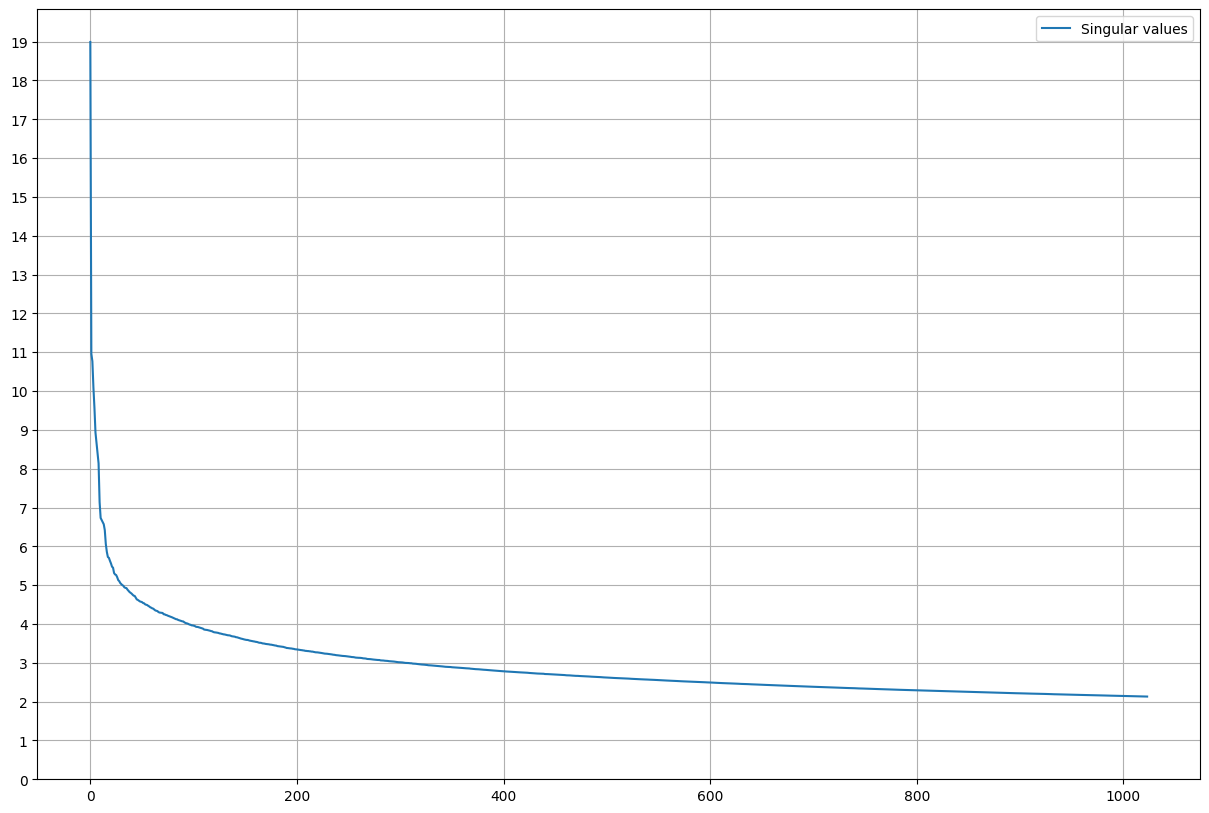

In [8]:
plt.figure(figsize=(15, 10))
plt.plot(s, label='Singular values')
plt.grid()
plt.legend()
plt.yticks(range(0, 20))
plt.show()